In [8]:
import nest_asyncio
nest_asyncio.apply()

from hddCRP.modelBuilder import cdCRP
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from statannotations.Annotator import Annotator
from sklearn.metrics import roc_auc_score

import itertools

from pandas.api.types import CategoricalDtype
import os

from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [9]:
overwrite_existing_results = False
results_directory = "Results/population/"

if(not os.path.exists(results_directory)):
    os.makedirs(results_directory)

data_filename = 'data/Data_turns_all_by_session.pkl';
with open(data_filename, 'rb') as data_file:
    data = pickle.load(data_file)

subjects = ["uniform", "diverse"]
subjects.sort()
print("subjects = " + str(subjects))

context_depth = 2;
nback_depth   = 1;
tau_enabled = False;
session_numbers = None#[1]; # index by 1
number_of_trials    = 50;

action_labels = [0,1,2]

subjects = ['diverse', 'uniform']


In [10]:
if(session_numbers is None):
    fit_file = f"{results_directory}/fits_trials_{number_of_trials}"
    fit_summary_file = f"{results_directory}/fit_summary_trials_{number_of_trials}"
    seed_offset = number_of_trials
else:
    start_session = np.min(session_numbers)
    end_session = np.max(session_numbers)
    fit_file = f"{results_directory}/fits_session_{start_session}"
    fit_summary_file = f"{results_directory}/fit_summary_session_{start_session}"
    if(end_session != start_session):
        fit_file += f"_to_{start_session}"
        fit_summary_file  += f"_to_{start_session}"
    seed_offset = start_session

fit_file += f"_cd{context_depth}_nb{nback_depth}"
fit_summary_file  += f"_cd{context_depth}_nb{nback_depth}"
if(not tau_enabled):
    fit_file += f"_no_tau"
    fit_summary_file  += f"_no_tau"

fit_file += f".pkl"
fit_summary_file += f".pkl"
if(not os.path.isfile(fit_file) or overwrite_existing_results):
    data_fits = pd.DataFrame()
    data_fit_metrics = pd.DataFrame()
    for subject_index, subject in enumerate(subjects):
        print(f"subject {subject} ")

        sequences = []
        session_types = []
        subject_labels = []
        for subject_p in data["group_definition"][subject]:
            sequences_0 = data["data"][subject_p]["data"]; # turns in each session
            session_types_0 = data["data"][subject_p]["task"] # which maze

            if(session_numbers is None):
                ii = list(np.where(np.array(session_types_0)=='C')[0])
                seqs_c = [sequences_0[xx] for xx in ii]
                seqs_c = list(itertools.chain.from_iterable(seqs_c))
                sequences += [seqs_c[:number_of_trials]]
                session_types += ['C']
                subject_labels += [subject_p]
            else:
                ii = list(np.where(np.array(session_types_0)=='C')[0][np.array(session_numbers)-1])
                sequences     += [sequences_0[xx] for xx in ii]
                session_types += [session_types_0[xx] for xx in ii]
                subject_labels += [subject_p] * len(ii)

        stan_seed = (subject_index+1) * 1000 + seed_offset

        model = cdCRP(sequences, session_labels=session_types, subject_labels=subject_labels, possible_observations=action_labels);
        model.same_nback_depth = nback_depth
        model.context_depth = context_depth
        model.within_session_decay_enabled = tau_enabled

        model.build(random_seed=stan_seed);
        model.fit_model()

        # map_fit = model.get_map()
        fit_df  = model.fit.to_frame()

        fit_df["subject"] = subject
        summary_df = model.fit_summary()
        summary_df["subject"] = subject
        # summary_df["MAP"] = pd.Series(map_fit)
        if(session_numbers is None):
            summary_df["number_of_trials"] = number_of_trials
            summary_df["start_session_C"]  = pd.NA
            summary_df["end_session_C"]    = pd.NA
            fit_df["number_of_trials"] = number_of_trials
            fit_df["start_session_C"]  = pd.NA
            fit_df["end_session_C"]    = pd.NA
        else:
            summary_df["number_of_trials"] = pd.NA
            summary_df["start_session_C"]  = start_session
            summary_df["end_session_C"]    = end_session
            fit_df["number_of_trials"] = pd.NA
            fit_df["start_session_C"]  = start_session
            fit_df["end_session_C"]    = end_session

        data_fit_metrics = pd.concat([data_fit_metrics,summary_df], copy=False)
        data_fits = pd.concat([data_fits,fit_df], copy=False)

    data_fits.to_pickle(fit_file)
    data_fit_metrics.to_pickle(fit_summary_file)
else:
    print("fit file found")



subject diverse 
Building...



Building: found in cache, done.Messages from stanc:
    prior is provided, or the prior(s) depend on data variables. In the later
    case, this may be a false positive.
    either no prior is provided, or the prior(s) depend on data variables. In
    the later case, this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%


Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   0% (3/8000)
Sampling:   0% (4/8000)
Sampling:   1% (103/8000)
Sampling:   3% (202/8000)
Sampling:   4% (301/8000)
Sampling:   5% (400/8000)
Sampling:   6% (500/8000)
Sampling:   8% (600/8000)
Sampling:   9% (700/8000)
Sampling:  10% (800/8000)
Sampling:  11% (900/8000)
Sampling:  12% (1000/8000)
Sampling:  14% (1100/8000)
Sampling:  15% (1200/8000)
Sampling:  16% (1300/8000)
Sampling:  18% (1400/8000)
Sampling:  19% (1500/8000)
Sampling:  20% (1600/8000)
Sampling:  21% (1700/8000)
Sampling:  22% (1800/8000)
Sampling:  24% (1900/8000)
Sampling:  25% (2000/8000)
Sampling:  26% (2100/8000)
Sampling:  28% (2200/8000)
Sampling:  29% (2300/8000)
Sampling:  30% (2400/8000)
Sampling:  31% (2500/8000)
Sampling:  32% (2600/8000)
Sampling:  34% (2700/8000)
Sampling:  35% (2800/8000)
Sampling:  36% (2900/8000)
Sampling:  38% (3000/8000)
Sampling:  39% (3100/8000)
Sampling:  40% (3200/8000)
Sampling:  41% (3300/8000)
Sampling:  42% (3400/

subject uniform 
Building...



Building: found in cache, done.Messages from stanc:
    prior is provided, or the prior(s) depend on data variables. In the later
    case, this may be a false positive.
    either no prior is provided, or the prior(s) depend on data variables. In
    the later case, this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   0% (3/8000)
Sampling:   0% (4/8000)
Sampling:   1% (103/8000)
Sampling:   3% (202/8000)
Sampling:   4% (301/8000)
Sampling:   5% (400/8000)
Sampling:   6% (500/8000)
Sampling:   8% (600/8000)
Sampling:   9% (700/8000)
Sampling:  10% (800/8000)
Sampling:  11% (900/8000)
Sampling:  12% (1000/8000)
Sampling:  14% (1100/8000)
Sampling:  15% (1200/8000)
Sampling:  16% (1300/8000)
Sampling:  18% (1400/8000)
Sampling:  19% (1500/8000)
Sampling:  20% (1600/8000)
Sampling:  21% (1700/8000)
Sampling:  22% (1800/8000)
Samp

In [11]:
parameter_name_map = {"alpha" : "concentration", 
                      "context_similarity_depth_1" : "context weight level 1",
                      "context_similarity_depth_2" : "context weight level 2", 
                      "repeat_bias_1_back" : "repeat bias",
                      "timeconstant_within_session_A" : "time constant",
                      "timeconstant_within_session_C" : "time constant"}

 
summary_df = pd.read_pickle(fit_summary_file)
summary_df.index.name = "parameter"
summary_df = summary_df.reset_index()
summary_df["parameter"] = summary_df["parameter"].map(parameter_name_map)
data_fits  = pd.read_pickle(fit_file)
data_fits.rename(columns=parameter_name_map, inplace=True)

params = list(summary_df["parameter"].unique());

data_fits

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,concentration,repeat bias,context weight level 1,...,log_likelihood.5,log_likelihood.6,log_likelihood.7,log_likelihood.8,log_likelihood.9,subject,number_of_trials,start_session_C,end_session_C,log_likelihood.10
draws,,,,,,,,,,,,,,,,,,,,,
0,-503.450156,0.995701,0.596360,3.0,7.0,0.0,504.387793,8.353650,0.710597,0.954899,...,-46.979015,-53.197594,-57.125719,-55.591824,-54.272988,diverse,50,NaN,NaN,NaN
1,-503.383445,0.913204,0.645199,1.0,3.0,0.0,505.050730,6.318552,0.719515,0.814796,...,-47.652022,-53.215736,-57.149232,-55.802188,-54.052363,diverse,50,NaN,NaN,NaN
2,-503.725783,0.617980,0.687813,2.0,7.0,0.0,505.521817,7.968746,0.644077,0.839504,...,-47.701278,-53.180746,-57.279836,-55.461468,-54.234586,diverse,50,NaN,NaN,NaN
3,-504.220739,0.969133,0.528739,3.0,7.0,0.0,504.819629,9.017803,0.873802,0.774235,...,-48.659264,-53.422591,-56.424939,-55.638342,-53.658971,diverse,50,NaN,NaN,NaN
4,-503.518352,0.963475,0.596360,2.0,7.0,0.0,504.578817,5.705986,0.704361,0.916581,...,-46.643951,-53.186340,-57.465877,-56.087536,-54.351484,diverse,50,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-562.882984,0.853620,0.708090,2.0,3.0,0.0,564.391973,10.301497,1.314863,0.723491,...,-52.221842,-54.736376,-55.953401,-54.095751,-54.439671,uniform,50,NaN,NaN,-49.552148
3996,-563.223258,0.911599,0.602536,2.0,3.0,0.0,565.145763,8.258529,1.021918,0.474991,...,-52.236446,-55.593648,-55.925809,-54.711173,-54.310539,uniform,50,NaN,NaN,-50.372760
3997,-562.544964,0.995912,0.638360,2.0,7.0,0.0,563.546856,8.393387,1.183967,0.558080,...,-52.122296,-55.247392,-55.984082,-54.432479,-54.356003,uniform,50,NaN,NaN,-49.913255


concentration: p(diverse > uniform) = 0.2425415625 (opp = 0.7574584375)
context weight level 1: p(diverse > uniform) = 0.96389975 (opp = 0.03610024999999999)
repeat bias: p(diverse > uniform) = 0.0377815625 (opp = 0.9622184375)


/home/latimerk/anaconda3/envs/JaiYuLab/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


['concentration', 'context weight level 1', 'repeat bias']

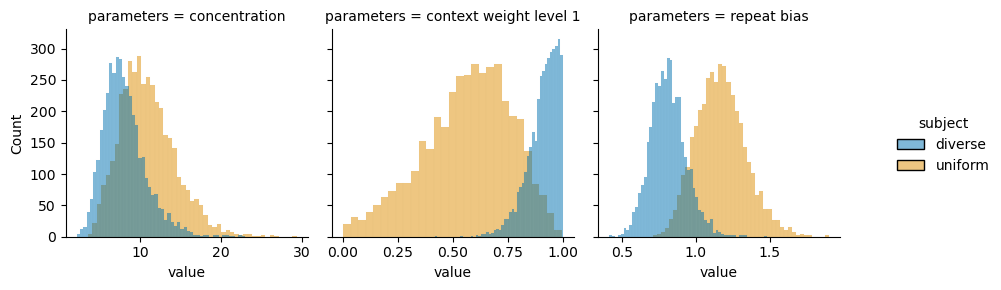

In [12]:
pval_seed = 10;
sim_rng = np.random.Generator(np.random.MT19937(pval_seed))

pval = np.zeros((len(params)))
pval2 = np.zeros((len(params)))
for ii, param in enumerate(params):
    #fit.hist(params[ii], by="subject", ax=ax);
    cat_type = CategoricalDtype(categories=["uniform", "diverse"], ordered=False)
    df_c = data_fits[["subject", param]]
    df_c = df_c.assign(subject_c= df_c["subject"].astype(cat_type))
    df_c = df_c.assign(subject_c2= df_c["subject"].astype(cat_type))
    df_c['subject_c'].replace(['uniform', 'diverse'],
                            [0, 1], inplace=True)
    df_c['subject_c2'].replace(['uniform', 'diverse'],
                            [1, 0], inplace=True)
    pval[ii]  = roc_auc_score(df_c['subject_c' ].to_numpy(), df_c[param].to_numpy())
    pval2[ii] = roc_auc_score(df_c['subject_c2'].to_numpy(), df_c[param].to_numpy())

    print(f"{param}: p(diverse > uniform) = {pval[ii]} (opp = {pval2[ii]})")


df_c2 = data_fits.melt(value_vars=params, id_vars=["subject"])


sns.displot(
    df_c2, x="value", col="parameters", hue="subject", palette="colorblind",
    height=3, facet_kws={"margin_titles": True, "sharex" :False},common_bins=False
)

params



/home/latimerk/anaconda3/envs/JaiYuLab/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


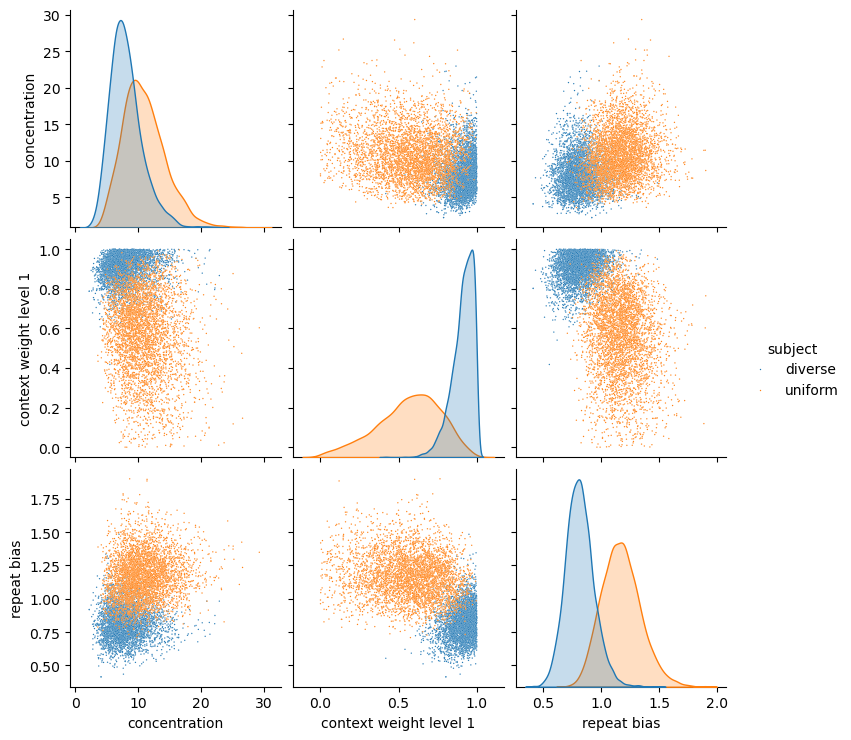

In [13]:

sns.pairplot(data_fits, hue="subject", vars=params,
    plot_kws=dict(s=1))


In [14]:
# X = data_fits[["repeat bias", "context weight level 1"]]#[params]
# y = data_fits['subject']

# #define cross-validation method to use
# cv = LeaveOneOut()

# #build multiple linear regression model
# model = SVC(kernel='linear', C=1, random_state=192)

# #use LOOCV to evaluate model
# scores = cross_val_score(model, X, y,
#                          cv=cv, n_jobs=-1)

# #view mean absolute error
# np.mean(np.absolute(scores))
# plt.hist(scores)